In [9]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

# print(tf.__version__) 

In [10]:
from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

In [11]:
from IPython.display import clear_output

In [91]:
import numpy as np

from PIL import ImageFont
from PIL import Image, ImageDraw
from PIL import ImageColor

from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

In [93]:
import random

In [12]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

def show( img, name= 'noname'):
  plt.imshow( img)
  plt.title( name)
  plt.show()

def show_gimage( img, name= 'noname'):
  plt.imshow( img, cmap= 'gray')
  plt.title( name)
  plt.show()

def _load_image( path):
  # return cv2.imread( path, cv2.IMREAD_GRAYSCALE)
  return cv2.imread( path)
  
def write_image( path, img):
  cv2.imwrite( path, img)

# def resize( img, scale_percent= 60, verbose=False):
#   #scale_percent = 60 # percent of original size
#   width = int(img.shape[1] * scale_percent / 100)
#   height = int(img.shape[0] * scale_percent / 100)
#   dim = (width, height)
#   if verbose:
#     print( "scale", scale_percent)
#     print( "dim", dim)
#   # resize image
#   return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

In [13]:
import time
import shutil

In [14]:
import uuid

In [15]:
from shutil import copyfile

In [42]:
#orig_imgdir= 'C:/mestrado/datasets/handmade/imagens-originais/paired-part5-/images_with_header'
orig_imgdir= 'C:/mestrado/datasets/final/paired-all/images_with_header'
dest_imgdir= 'C:/mestrado/datasets/final/parts-lib/from-handmade'
files= glob( os.path.join( orig_imgdir, "*.jpg"))

In [43]:
len( files)

3408

In [3]:
str( uuid.uuid4())[:6]

'db0b0f'

In [39]:
words= ['Ba4', 'Ba5', 'Ba7', 'Bb2', 'Bb3', 'Bb4', 'Bb4+', 'Bb5', 'Bb5+', 'Bb7', 'Bc4', 'Bc5', 'Bd2', 'Bd3', 'Bd6', 'Bd7', 'Be2', 'Be3', 'Be5', 'Be6', 'Be7', 'Bf3', 'Bf4', 'Bf5', 'Bg2', 'Bg3', 'Bg4', 'Bg5', 'Bg7', 'Bh4', 'Bh6', 'Bh7', 'Bxb4', 'Bxc3', 'Bxc3+', 'Bxc4', 'Bxc5', 'Bxc6', 'Bxc7', 'Bxd2+', 'Bxd6', 'Bxd7+', 'Bxf6', 'Kd8', 'Kxd8', 'Na4', 'Na5', 'Na6', 'Nb3', 'Nb4', 'Nb5', 'Nb6', 'Nbd2', 'Nbd7', 'Nbxd2', 'Nc2', 'Nc3', 'Nc5', 'Nc6', 'Nce7', 'Nd2', 'Nd4', 'Nd5', 'Nd6+', 'Nd7', 'Ndb5', 'Nde2', 'Ne1', 'Ne2', 'Ne4', 'Ne5', 'Ne7', 'Nf1', 'Nf3', 'Nf6', 'Nfd7', 'Ng5', 'Nge2', 'Nge7', 'Ngf3', 'Ngf6', 'Nh5', 'Nxc6', 'Nxd4', 'Nxd5', 'Nxd7', 'Nxe4', 'Nxe5', 'Nxf6+', 'O-O', 'O-O-O', 'Qa4', 'Qa5', 'Qa5+', 'Qb3', 'Qb6', 'Qc2', 'Qc3', 'Qc7', 'Qd1', 'Qd2', 'Qd3', 'Qd4', 'Qd5', 'Qd6', 'Qd7', 'Qe1', 'Qe2', 'Qe7', 'Qe8', 'Qf3', 'Qf6', 'Qg6', 'Qh4', 'Qxb2', 'Qxb3', 'Qxc4', 'Qxc7', 'Qxd4', 'Qxd5', 'Qxd6', 'Qxd8+', 'Qxe4+', 'Qxf6', 'Rb1', 'Rb8', 'Rc8', 'Re1', 'Re8', 'a3', 'a4', 'a5', 'a6', 'b3', 'b4', 'b5', 'b6', 'bxc3', 'bxc6', 'c3', 'c4', 'c5', 'c6', 'cxb3', 'cxd4', 'cxd5', 'cxd6', 'd3', 'd4', 'd5', 'd6', 'dxc3', 'dxc4', 'dxc5', 'dxc6', 'dxe4', 'e3', 'e4', 'e5', 'e6', 'exd4', 'exd5', 'exf6', 'f3', 'f4', 'f5', 'f6', 'g3', 'g5', 'g6', 'gxf6', 'h3', 'h4', 'h5', 'h6']

In [40]:
len( words)

175

In [48]:
#
# recorta a imagem em partes a partir da base de manuscritos..
#
def save_cuts( labels, cuts):
    
    for i in range( 0, len( cuts)):

        label= labels[i].replace( '...', '___')
        folder= os.path.join( dest_imgdir, label)
        
        Path(folder).mkdir(parents=True, exist_ok=True)
        fname= label+"_"+ str( uuid.uuid4())[:6]+'.jpg'
#         print( 'save to ', fname)
        write_image( os.path.join( folder, fname), cuts[i])
        

def showsmall( img, name= 'noname'):
    plt.figure(figsize = (4,6))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
                    
def showbig( img, name= 'noname'):
    plt.figure(figsize = (10,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
    
def crop_only( img, y, h, x, w):
    y= max( y, 0)
    x= max( x, 0)
#     print( '>', y, h, x, w)
    crop_img= img[ y:y+h, x:x+w]
    return crop_img


def get_cut_for( i, col_img):
    img= col_img[0] if i%2== 0 else col_img[1]

    h= 69.72
    ln= int( i/2)
    margin_h= 5
    shift_h= 12
    y= int( ln* h)+ shift_h
    return crop_only( img, y-margin_h, int(h+2*margin_h), 0, img.shape[1])


def generate_parts(_files):
    # w= 335 
    w= 320 
    count= 0
    for f in _files:
        # trim
    #     clear_output()
        if count%10== 0:
            print( count)
        count+= 1

    #     clear_output()
        img= cv2.imread( f)
#         show( img)

        labels= read_label( os.path.join( 'C:/mestrado/datasets/final/paired-all/labels',
                                        Path( f).name.replace( '.jpg', '.pgn')
                                        ))

#         print( labels)

        img1= img[504:,:]
#         img2= np.concatenate((
#             img1[:, 3:(3+w)],
#             img1[:, 435:(435+w)],
#             img1[:, 772:(772+w)],
#             img1[:, 1200:(1200+w)]
#         ), axis= 1)
#         showsmall( img1[:, 5:(5+w)])
#         showsmall( img1[:, 435:(435+w)])
#         showsmall( img1[:, 772:(772+w)])
#         showsmall( img1[:, 1200:(1200+w)])

        img_1= img1[:, 5:(5+w)]
        img_2= img1[:, 435:(435+w)]
#         img_3= img1[:, 772:(772+w)]
#         img_4= img1[:, 1200:(1200+w)]


#         showsmall(img_1)
#         showsmall(img_2)
        pgn= labels.split()
        col_img= [img_1, img_2]
        cuts= []
        labels= []
        for i in range( 0, min( 50, len( pgn))):
            if pgn[i] in words:
                img_cut= get_cut_for( i, col_img)
#                 showsmall( img_cut, pgn[i])

                cuts.append( img_cut)
                labels.append( pgn[i])
            
        save_cuts( labels, cuts)

    #     m= input()    
    #     img3= cv2.resize(img2, (678, 900), interpolation = cv2.INTER_AREA)  
    #     img3= img2
    #     to_file= os.path.join( dest_imgdir, Path( f).name)
    #     print( 'save to ', to_file)
    #     write_image( to_file, img3)

generate_parts( files[0:1])

0


In [49]:
generate_parts( files[1:20])

0
10


In [50]:
generate_parts( files[20:100])

0
10
20
30
40
50
60
70


In [51]:
generate_parts( files[100:1000])

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890


In [52]:
generate_parts( files[1000:])

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [ ]:
#
# partes a partir de dados de torneio
#

In [53]:
#orig_imgdir= 'C:/mestrado/datasets/handmade/imagens-originais/paired-part5-/images_with_header'
orig_imgdir= 'C:/mestrado/datasets/final/carnaval_fullpage_clean/images'
dest_imgdir= 'C:/mestrado/datasets/final/parts-lib/from-torneios'
files= glob( os.path.join( orig_imgdir, "*.jpg"))

In [54]:
len( files)

621

In [61]:
#
# recorta a imagem em partes a partir da base de manuscritos..
#
def save_cuts( labels, cuts):
    for i in range( 0, len( cuts)):
        label= labels[i].replace( '...', '___')
        folder= os.path.join( dest_imgdir, label)
        
        Path(folder).mkdir(parents=True, exist_ok=True)
        fname= label+"_torn_"+ str( uuid.uuid4())[:6]+'.jpg'
#         print( 'save to ', fname)
        write_image( os.path.join( folder, fname), cuts[i])
        

def showsmall( img, name= 'noname'):
    plt.figure(figsize = (4,6))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
                    
def showbig( img, name= 'noname'):
    plt.figure(figsize = (10,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
    
def crop_only( img, y, h, x, w):
    y= max( y, 0)
    x= max( x, 0)
#     print( '>', y, h, x, w)
    crop_img= img[ y:y+h, x:x+w]
    return crop_img


def get_cut_for( i, col_img):
    img= col_img[0] if i%2== 0 else col_img[1]

    h= 69.72
    ln= int( i/2)
    margin_h= 5
    shift_h= 12
    y= int( ln* h)+ shift_h
    return crop_only( img, y-margin_h, int(h+2*margin_h), 0, img.shape[1])


def generate_parts(_files):
    # w= 335 
    w= 320 
    count= 0
    for f in _files:
        # trim
    #     clear_output()
        if count%10== 0:
            print( count)
        count+= 1

    #     clear_output()
        img= cv2.imread( f)
#         show( img)

        labels= read_label( f.replace( 'images', 'labels').replace('.jpg', '.pgn'))
#         print( labels)

        img1= img #img[504:,:]

        img_1= img1[:, 5:(5+w)]
        img_2= img1[:, 435:(435+w)]
#         img_3= img1[:, 772:(772+w)]
#         img_4= img1[:, 1200:(1200+w)]


#         showsmall(img_1)
#         showsmall(img_2)
        pgn= labels.split()
        col_img= [img_1, img_2]
        cuts= []
        labels= []
        for i in range( 0, min( 50, len( pgn))):
            if pgn[i] in words:
                img_cut= get_cut_for( i, col_img)
#                 showsmall( img_cut, pgn[i])

                cuts.append( img_cut)
                labels.append( pgn[i])
            
        save_cuts( labels, cuts)

    #     m= input()    
    #     img3= cv2.resize(img2, (678, 900), interpolation = cv2.INTER_AREA)  
    #     img3= img2
    #     to_file= os.path.join( dest_imgdir, Path( f).name)
    #     print( 'save to ', to_file)
    #     write_image( to_file, img3)

generate_parts( files)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620


In [ ]:
#
# sinteticos - para completar pelo menos 250 exemplares para cada word
#

In [62]:
# calcula quantos tem juntando sinteticos e torneios

counter= {w:0 for w in words}

In [63]:
counter

{'Ba4': 0,
 'Ba5': 0,
 'Ba7': 0,
 'Bb2': 0,
 'Bb3': 0,
 'Bb4': 0,
 'Bb4+': 0,
 'Bb5': 0,
 'Bb5+': 0,
 'Bb7': 0,
 'Bc4': 0,
 'Bc5': 0,
 'Bd2': 0,
 'Bd3': 0,
 'Bd6': 0,
 'Bd7': 0,
 'Be2': 0,
 'Be3': 0,
 'Be5': 0,
 'Be6': 0,
 'Be7': 0,
 'Bf3': 0,
 'Bf4': 0,
 'Bf5': 0,
 'Bg2': 0,
 'Bg3': 0,
 'Bg4': 0,
 'Bg5': 0,
 'Bg7': 0,
 'Bh4': 0,
 'Bh6': 0,
 'Bh7': 0,
 'Bxb4': 0,
 'Bxc3': 0,
 'Bxc3+': 0,
 'Bxc4': 0,
 'Bxc5': 0,
 'Bxc6': 0,
 'Bxc7': 0,
 'Bxd2+': 0,
 'Bxd6': 0,
 'Bxd7+': 0,
 'Bxf6': 0,
 'Kd8': 0,
 'Kxd8': 0,
 'Na4': 0,
 'Na5': 0,
 'Na6': 0,
 'Nb3': 0,
 'Nb4': 0,
 'Nb5': 0,
 'Nb6': 0,
 'Nbd2': 0,
 'Nbd7': 0,
 'Nbxd2': 0,
 'Nc2': 0,
 'Nc3': 0,
 'Nc5': 0,
 'Nc6': 0,
 'Nce7': 0,
 'Nd2': 0,
 'Nd4': 0,
 'Nd5': 0,
 'Nd6+': 0,
 'Nd7': 0,
 'Ndb5': 0,
 'Nde2': 0,
 'Ne1': 0,
 'Ne2': 0,
 'Ne4': 0,
 'Ne5': 0,
 'Ne7': 0,
 'Nf1': 0,
 'Nf3': 0,
 'Nf6': 0,
 'Nfd7': 0,
 'Ng5': 0,
 'Nge2': 0,
 'Nge7': 0,
 'Ngf3': 0,
 'Ngf6': 0,
 'Nh5': 0,
 'Nxc6': 0,
 'Nxd4': 0,
 'Nxd5': 0,
 'Nxd7': 0,
 'Nxe4': 0,
 'Nxe5':

In [74]:
parts_dir= 'C:/mestrado/datasets/final/parts-lib/*'

In [79]:
for w in words:
    n= len( glob( os.path.join( parts_dir, w, "*.jpg")))
    print( w, n)
    counter[w]= n
    

Ba4 208
Ba5 92
Ba7 47
Bb2 564
Bb3 440
Bb4 513
Bb4+ 100
Bb5 585
Bb5+ 123
Bb7 1008
Bc4 785
Bc5 474
Bd2 712
Bd3 1416
Bd6 672
Bd7 1113
Be2 1136
Be3 1565
Be5 226
Be6 867
Be7 1703
Bf3 316
Bf4 807
Bf5 614
Bg2 1063
Bg3 285
Bg4 748
Bg5 1264
Bg7 1515
Bh4 315
Bh6 339
Bh7 50
Bxb4 86
Bxc3 748
Bxc3+ 116
Bxc4 389
Bxc5 275
Bxc6 709
Bxc7 24
Bxd2+ 56
Bxd6 172
Bxd7+ 65
Bxf6 638
Kd8 88
Kxd8 52
Na4 269
Na5 329
Na6 296
Nb3 413
Nb4 291
Nb5 325
Nb6 545
Nbd2 569
Nbd7 934
Nbxd2 13
Nc2 144
Nc3 3235
Nc5 588
Nc6 2649
Nce7 35
Nd2 760
Nd4 626
Nd5 895
Nd6+ 46
Nd7 1079
Ndb5 55
Nde2 38
Ne1 167
Ne2 528
Ne4 939
Ne5 1052
Ne7 541
Nf1 193
Nf3 3915
Nf6 3920
Nfd7 177
Ng5 417
Nge2 256
Nge7 225
Ngf3 89
Ngf6 113
Nh5 368
Nxc6 321
Nxd4 1353
Nxd5 835
Nxd7 157
Nxe4 771
Nxe5 694
Nxf6+ 145
O-O 6324
O-O-O 713
Qa4 240
Qa5 529
Qa5+ 92
Qb3 494
Qb6 669
Qc2 879
Qc3 149
Qc7 1266
Qd1 196
Qd2 1045
Qd3 421
Qd4 168
Qd5 180
Qd6 310
Qd7 622
Qe1 177
Qe2 885
Qe7 638
Qe8 185
Qf3 366
Qf6 284
Qg6 119
Qh4 259
Qxb2 100
Qxb3 67
Qxc4 146
Qxc7 59
Qxd4 338
Q

In [80]:
counter_s= {k: v for k, v in sorted(counter.items(), key=lambda item: item[1], reverse=True)}
print( counter_s)


{'O-O': 6324, 'Nf6': 3920, 'Nf3': 3915, 'd4': 3666, 'e4': 3353, 'Nc3': 3235, 'd5': 3031, 'c5': 2860, 'e5': 2772, 'Nc6': 2649, 'c4': 2468, 'e6': 2358, 'd6': 1999, 'g6': 1842, 'Be7': 1703, 'a6': 1638, 'cxd4': 1586, 'Be3': 1565, 'Bg7': 1515, 'f4': 1435, 'b5': 1433, 'Bd3': 1416, 'Nxd4': 1353, 'g3': 1321, 'h3': 1280, 'c6': 1272, 'Qc7': 1266, 'Bg5': 1264, 'f5': 1259, 'h6': 1200, 'c3': 1181, 'b4': 1156, 'Be2': 1136, 'Bd7': 1113, 'exd5': 1110, 'Nd7': 1079, 'b6': 1066, 'Bg2': 1063, 'Ne5': 1052, 'a4': 1047, 'Qd2': 1045, 'a3': 1043, 'e3': 1032, 'Bb7': 1008, 'a5': 1003, 'cxd5': 999, 'b3': 983, 'Ne4': 939, 'Nbd7': 934, 'Re1': 920, 'Nd5': 895, 'Qe2': 885, 'Qc2': 879, 'Be6': 867, 'Re8': 864, 'Nxd5': 835, 'Bf4': 807, 'Bc4': 785, 'd3': 778, 'Nxe4': 771, 'f3': 770, 'Nd2': 760, 'Bg4': 748, 'Bxc3': 748, 'bxc3': 748, 'h4': 744, 'h5': 726, 'O-O-O': 713, 'Bd2': 712, 'Bxc6': 709, 'bxc6': 709, 'Nxe5': 694, 'f6': 692, 'Bd6': 672, 'Qb6': 669, 'g5': 665, 'Rc8': 657, 'Bxf6': 638, 'Qe7': 638, 'Nd4': 626, 'Qd7': 622

In [ ]:
#
#  gera sintetizados até a quantidade min(qtd*1.20, 250)
#

In [90]:
def gera_syn( w, n, n_atual):
    print( 'gerando ', n, 'para', w, 'atual=', n_atual, 'total', n_atual+n)

t= 0
for w in words:
    esperado= max( int( counter[w]*1.2), 250)
    n= esperado- counter[w]
    gera_syn( w, n, counter[w])
    t= t+n
    
print( 'total', t)

gerando  42 para Ba4 atual= 208 total 250
gerando  158 para Ba5 atual= 92 total 250
gerando  203 para Ba7 atual= 47 total 250
gerando  112 para Bb2 atual= 564 total 676
gerando  88 para Bb3 atual= 440 total 528
gerando  102 para Bb4 atual= 513 total 615
gerando  150 para Bb4+ atual= 100 total 250
gerando  117 para Bb5 atual= 585 total 702
gerando  127 para Bb5+ atual= 123 total 250
gerando  201 para Bb7 atual= 1008 total 1209
gerando  157 para Bc4 atual= 785 total 942
gerando  94 para Bc5 atual= 474 total 568
gerando  142 para Bd2 atual= 712 total 854
gerando  283 para Bd3 atual= 1416 total 1699
gerando  134 para Bd6 atual= 672 total 806
gerando  222 para Bd7 atual= 1113 total 1335
gerando  227 para Be2 atual= 1136 total 1363
gerando  313 para Be3 atual= 1565 total 1878
gerando  45 para Be5 atual= 226 total 271
gerando  173 para Be6 atual= 867 total 1040
gerando  340 para Be7 atual= 1703 total 2043
gerando  63 para Bf3 atual= 316 total 379
gerando  161 para Bf4 atual= 807 total 968
ger

In [82]:
counter['e4']

3353

In [95]:
# 
# carrega as fontes
#
new_fonts_files= glob( 'C:/mestrado/datasets/samples_font--2/*.ttf.jpg')
print( len( new_fonts_files))
new_fonts_path= [
    os.path.join( 'C:/mestrado/datasets/fonts', 
                 Path( f).name.replace( '.jpg', '')) for f in new_fonts_files]
new_fonts= [ImageFont.truetype(f, 60) for f in new_fonts_path]
fonts= [
    ImageFont.truetype('c:/Windows/Fonts/BRADHITC.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/ITCKRIST.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/LHANDW.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/Inkfree.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/OCRAEXT.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/TEMPSITC.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/PAPYRUS.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/MAIAN.TTF', 60)
] 
all_fonts= new_fonts + fonts

120


In [96]:
#
# distorcoes
#
def sp_noise(npimage,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(npimage.shape,np.uint8)
    thres = 1 - prob 
    for i in range(npimage.shape[0]):
        for j in range(npimage.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = random.randint( 0, 128)
            else:
                output[i][j] = npimage[i][j]
    return output

def sp_noise_pil( pilimg, prob):
#     print( 'noise', prob)
    img= pilimg
    img= np.asarray( img)
    img= sp_noise(img, prob)
    img= PIL.Image.fromarray( img)
    return img

def distorce( img):
    # ELASTIC_ALPHA_SIGMA = ((1201, 10), (1501, 12), (991, 8))
#     print( 'distorce')
    if type( img)== PIL.Image.Image:
        img= np.asarray( img)
        img= elastic_transform_2(img, 991, 8)  #random.randint( 991, 1501), random.randint( 8, 12))
        img= PIL.Image.fromarray( img)
        return img
    else:
        return elastic_transform_2(img, 991, 8)  #random.randint( 991, 1501), random.randint( 8, 12))
    

# Rotate the foreground
def rotate( pilimg):
#     print( 'rotate')
    foreground= pilimg
    angle_degrees = random.uniform(-2.5,2.5)
#     print( angle_degrees)
    foreground = foreground.rotate(angle_degrees, resample=Image.BICUBIC, expand=True, fillcolor = (255,255,255))

    # Scale the foreground
#     scale = random.random() * .5 + .5 # Pick something between .5 and 1
#     scale = 1
#     new_size = (int(foreground.size[0] * scale), int(foreground.size[1] * scale))
#     foreground = foreground.resize(new_size, resample=Image.BICUBIC)
    return foreground
#     show( foreground)
    

def random_transform( pilimg, p):
    img= pilimg
    if( random.random()< 0.8):
        img= rotate( img)
#     if( random.random()< 0.1):
#         img= distorce( img)
    if( random.random()< 0.25):
        img= sp_noise_pil( img, random.uniform( 0.001, 0.0001))
    
    return img


In [97]:
def pgn_to_pt( w):
    # R => T
    # K => R
    # N => C
    # Q => D
    
    return w.replace( 'R', 'T').replace( 'K', 'R').replace( 'N', 'C').replace( 'Q', 'D')

In [113]:
dest_imgdir= 'C:/mestrado/datasets/final/parts-lib/from-syn'
def generate_sync_for_w( w):
#     print( 'w', w)
    
    img = Image.open("C:/mestrado/datasets/syn/template/template-1cell-1.jpg")  # load base image
    dctx = ImageDraw.Draw(img)  # create drawing context

    fnt= random.choice( all_fonts)
    width= 320
    h= 79
    dh_top= 4

    label= pgn_to_pt(w)
    txtsz = dctx.textsize(label, fnt)
    x= (width - txtsz[0])/2
    if random.random()< 0.7:
        xmargem= int( (width - txtsz[0])/3)
        x+= random.randint( -xmargem, xmargem)
    y= dh_top + (h - txtsz[1])/2 #+ margin_top

    dctx.text( (x, y), label, font=fnt, fill="#000000")
    del dctx
    return img

def save_syn_cut( label, img):
    
    folder= os.path.join( dest_imgdir, label)

    Path(folder).mkdir(parents=True, exist_ok=True)
    fname= label+"_syn_"+ str( uuid.uuid4())[:6]+'.jpg'
#     print( 'save to ', fname)
    img.save( os.path.join( folder, fname))
#     write_image( os.path.join( folder, fname), img)


def generate_sync( w, n):
    for i in range( 0, n):
        img= generate_sync_for_w( w)
#         img= random_transform( img, 0.3)
#         showbig( img)
        
        save_syn_cut( w, img)


def gera_syn( w, n, n_atual):
    print( 'gerando ', n, 'para', w, 'atual=', n_atual, 'total', n_atual+n)

t= 0
for w in words:
    esperado= max( int( counter[w]*1.2), 250)
    n= esperado- counter[w]
    print( 'gerando ', n, 'para', w, 'atual=', counter[w], 'total', counter[w]+n)
    generate_sync( w, n)
    t= t+n 
    
print( 'gerados ', t)

gerando  42 para Ba4 atual= 208 total 250
gerando  158 para Ba5 atual= 92 total 250
gerando  203 para Ba7 atual= 47 total 250
gerando  112 para Bb2 atual= 564 total 676
gerando  88 para Bb3 atual= 440 total 528
gerando  102 para Bb4 atual= 513 total 615
gerando  150 para Bb4+ atual= 100 total 250
gerando  117 para Bb5 atual= 585 total 702
gerando  127 para Bb5+ atual= 123 total 250
gerando  201 para Bb7 atual= 1008 total 1209
gerando  157 para Bc4 atual= 785 total 942
gerando  94 para Bc5 atual= 474 total 568
gerando  142 para Bd2 atual= 712 total 854
gerando  283 para Bd3 atual= 1416 total 1699
gerando  134 para Bd6 atual= 672 total 806
gerando  222 para Bd7 atual= 1113 total 1335
gerando  227 para Be2 atual= 1136 total 1363
gerando  313 para Be3 atual= 1565 total 1878
gerando  45 para Be5 atual= 226 total 271
gerando  173 para Be6 atual= 867 total 1040
gerando  340 para Be7 atual= 1703 total 2043
gerando  63 para Bf3 atual= 316 total 379
gerando  161 para Bf4 atual= 807 total 968
ger

In [ ]:
#
# gera dados a partir das partes
#

In [114]:
#
# le todas a partes e guarda em lista por word
#
word_cuts= {}
for w in words:
    word_cuts[w]= glob( os.path.join( 'C:/mestrado/datasets/final/parts-lib/*', w, "*.jpg"))

In [118]:
for w in words:
    print( w, len( word_cuts[w]))

Ba4 250
Ba5 250
Ba7 250
Bb2 676
Bb3 528
Bb4 615
Bb4+ 250
Bb5 702
Bb5+ 250
Bb7 1209
Bc4 942
Bc5 568
Bd2 854
Bd3 1699
Bd6 806
Bd7 1335
Be2 1363
Be3 1878
Be5 271
Be6 1040
Be7 2043
Bf3 379
Bf4 968
Bf5 736
Bg2 1275
Bg3 342
Bg4 897
Bg5 1516
Bg7 1818
Bh4 378
Bh6 406
Bh7 250
Bxb4 250
Bxc3 1046
Bxc3+ 250
Bxc4 466
Bxc5 330
Bxc6 991
Bxc7 250
Bxd2+ 250
Bxd6 250
Bxd7+ 250
Bxf6 765
Kd8 250
Kxd8 250
Na4 322
Na5 394
Na6 355
Nb3 495
Nb4 349
Nb5 390
Nb6 654
Nbd2 682
Nbd7 1120
Nbxd2 250
Nc2 250
Nc3 3882
Nc5 705
Nc6 3178
Nce7 250
Nd2 912
Nd4 751
Nd5 1074
Nd6+ 250
Nd7 1294
Ndb5 250
Nde2 250
Ne1 250
Ne2 633
Ne4 1126
Ne5 1262
Ne7 649
Nf1 250
Nf3 4698
Nf6 4704
Nfd7 250
Ng5 500
Nge2 307
Nge7 270
Ngf3 250
Ngf6 250
Nh5 441
Nxc6 385
Nxd4 1623
Nxd5 1002
Nxd7 250
Nxe4 925
Nxe5 832
Nxf6+ 250
O-O 7588
O-O-O 855
Qa4 288
Qa5 634
Qa5+ 250
Qb3 592
Qb6 802
Qc2 1054
Qc3 250
Qc7 1519
Qd1 250
Qd2 1254
Qd3 505
Qd4 250
Qd5 250
Qd6 372
Qd7 746
Qe1 250
Qe2 1062
Qe7 765
Qe8 250
Qf3 439
Qf6 340
Qg6 250
Qh4 310
Qxb2 250
Qxb3 250
Qx

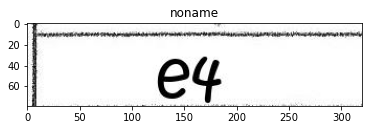

In [130]:
def get_random_cut_for( w):
    f= word_cuts[w][random.randrange( 0, len( word_cuts[w]))]
    return _load_image( f)

show( get_random_cut_for('e4'))

In [150]:
def random_label_from_vocab():
    label= []
    for i in range( 0, 16):
        label.append( 
            words[random.randrange( 0, len( words))]
        )
    return label

print( random_label_from_vocab())    

['Qb6', 'Qd1', 'h5', 'Ne4', 'Nb6', 'Bxc7', 'Nc5', 'Qa4', 'h3', 'dxe4', 'Ba4', 'd6', 'Nb5', 'O-O-O', 'Bd6', 'Qa5']


In [156]:
def rebuild( cuts):
    col1= np.concatenate((
            cuts[ 0], cuts[ 2], cuts[ 4], cuts[ 6], cuts[ 8], 
            cuts[10], cuts[12], cuts[14]
          ), axis= 0)
    col2= np.concatenate((
            cuts[ 1], cuts[ 3], cuts[ 5], cuts[ 7], cuts[ 9], 
            cuts[11], cuts[13], cuts[15]
          ), axis= 0)
    return np.concatenate((col1, col2), axis= 1)

def generate_for_label( label, seq, folder):    
    cuts= []
    for w in label:
        cuts.append( get_random_cut_for( w))
    img= rebuild( cuts)
    fname= "random_"+str(seq).zfill(5) 
    write_image( os.path.join( folder, 'images', fname+ ".jpg"), img)
    write_label( os.path.join( folder, 'labels', fname+ ".pgn"), " ".join( label))
    



In [158]:
def generate_mix( N):
    N_train= int(N*.8)
    folder= os.path.join( "C:/mestrado/datasets/final/random-32k-8lines--v21", "train")
    for i in range( 0, N):
        if i%100== 0:
            print( i)
        if i>= N_train:
            folder= os.path.join( "C:/mestrado/datasets/final/random-32k-8lines--v21", "valid")
        generate_for_label( random_label_from_vocab(), i+1, folder)
        
generate_mix( 10)

0


In [ ]:
# label= random_label_from_vocab()
# img= generate_one( label_pt)


AttributeError: 'list' object has no attribute 'add'